Alejandro Alquezar Pitarch - Proyecto Universitario

# Datos Ausentes y Normalización

Cargamos los datos y realizamos un gráfico para tener una representación visual de
los datos ausentes por cada variable.

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer, IterativeImputer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [83]:
surveys = pd.read_csv("surveys.csv")

In [84]:
surveys.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


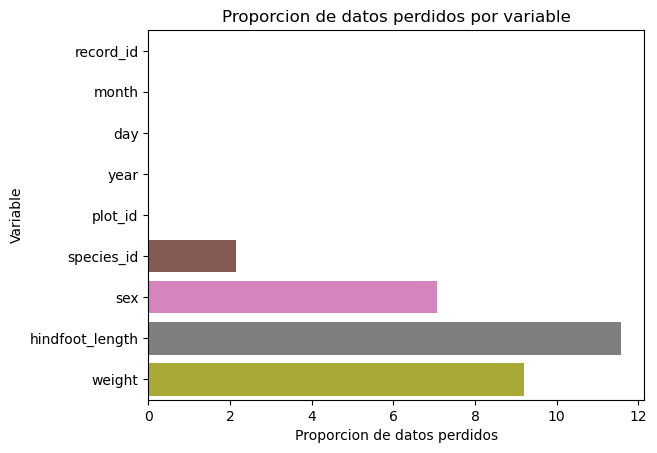

In [85]:
missing_data_count = surveys.isnull().sum()
missing_data_ratio = (missing_data_count / len(surveys)) * 100

missing_data_summary = pd.DataFrame({'Variable': missing_data_count.index,
                                     'Datos_faltantes': missing_data_count.values,
                                     'Ratio_datos_faltantes': missing_data_ratio.values})

sns.barplot(x="Ratio_datos_faltantes", y = "Variable", data = missing_data_summary)
plt.title("Proporcion de datos perdidos por variable")
plt.xlabel("Proporcion de datos perdidos")
plt.ylabel("Variable")
plt.show()

Tomamos la variable ‘weight’ como dependiente y las variables explicativas ‘month’,
‘year’, ‘plot_id’, ‘sex’ y ‘hindfoot_length’. Dado que sex no es una variable numérica,
y eso nos puede causar problemas, sustituimos los valores de M (macho) por el valor
0 y los valores de F (hembra) por el valor 1.

In [86]:
#Dado que la variable sex no es númerica, vamos a sustituir M (macho) por 0 y F (hembra) por 1.
surveys['sex'] = surveys['sex'].replace({'M': 0, 'F': 1})

data_clean = surveys.dropna(subset=['weight'])

variables_explicativas = ['month', 'year', 'plot_id', 'sex', 'hindfoot_length']
y = data_clean['weight']
X = data_clean[variables_explicativas]

print("¿Hay valores nulos en la variable weight?")
print(data_clean['weight'].isnull().any())

# Mostrar el número de observaciones en los conjuntos de datos X e y
print("\nNúmero de observaciones en el conjunto de datos X (variables explicativas):", X.shape[0])
print("Número de observaciones en el conjunto de datos y (variable dependiente):", y.shape[0])

¿Hay valores nulos en la variable weight?
False

Número de observaciones en el conjunto de datos X (variables explicativas): 32283
Número de observaciones en el conjunto de datos y (variable dependiente): 32283


### Mecanismos de imputación

Empezamos primero utilizando imputación simple usando la media:

In [87]:
#Imputación simple usando la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_imp_simple_media = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_imp_simple_media)

Coeficiente de determinación (R^2): 0.4334811293712356


Ahora, realizamos imputación simple usando la mediana:

In [88]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_imp_simple_mediana = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_imp_simple_mediana)

Coeficiente de determinación (R^2): 0.4372417276222883


A continuación, realizamos imputación múltiple usando regresiones (MICE):


In [89]:
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_imp_multiple_simple = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_imp_multiple_simple)

Coeficiente de determinación (R^2): 0.43919327531655894


Continuamos utilizando una imputación múltiple en este caso usando árboles:

In [90]:
imputer = IterativeImputer(estimator=DecisionTreeRegressor(), random_state=0)
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresion mediante arboles de decisiones
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_imp_multiple_arbol = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_imp_multiple_arbol)

Coeficiente de determinación (R^2): 0.4407359858018337


C:\Users\Alejandro\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Finalmente, utilizamos imputación múltiple usando k vecinos más cercanos:


In [91]:
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)

# Ajustar el modelo de regresion mediante arboles de decisiones
model = LinearRegression()
model.fit(X_imputed, y)

# Predecir los valores de y utilizando el modelo ajustado
y_pred = model.predict(X_imputed)

# Calcular el coeficiente de determinación (R^2)
score_knn = r2_score(y, y_pred)
print("Coeficiente de determinación (R^2):", score_knn)

Coeficiente de determinación (R^2): 0.4452573283071828


Y, como podemos observar, tiene el coeficiente de determinación mas elevado con
un valor de 0,44525… Lo que nos indica que es el mejor método para imputar los
valores ausentes en este caso. Otro método no utilizado en este caso puede ser el de
imputación por interpolación.

Introducimos los valores del modelo a nuestro conjunto de datos limpio:

In [101]:
data_clean.loc[:, 'month'] = X_imputed[:, 0]
data_clean.loc[:, 'year'] = X_imputed[:, 1]
data_clean.loc[:, 'plot_id'] = X_imputed[:, 2]
data_clean.loc[:, 'sex'] = X_imputed[:, 3]
data_clean.loc[:, 'hindfoot_length'] = X_imputed[:, 4]

In [102]:
data_clean.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,0.0,35.0,40.0
63,64,8,19,1977,7,DM,0.0,37.0,48.0
64,65,8,19,1977,4,DM,1.0,34.0,29.0
65,66,8,19,1977,4,DM,1.0,35.0,46.0
66,67,8,19,1977,7,DM,0.0,35.0,36.0


### Normalización

Empezamos seleccionando las columnas numéricas que vamos a normalizar. En este
caso, son las columnas ‘weight’ y ‘hindfoot_length’. Una vez tenemos los datos, los
normalizamos usando Z-score con la función StandardScaler(). Finalmente,
unificamos los datos en un misconjunto de datosset.

In [105]:
col_num = ['hindfoot_length', 'weight']
num_data = data_clean[col_num]

In [98]:
scaler = StandardScaler()
datos_norm = pd.DataFrame(scaler.fit_transform(num_data), columns = col_num)

In [121]:
datos_cat = data_clean.drop(columns = col_num)
datos_unificados = pd.concat([datos_cat, datos_norm], axis = 1)

In [122]:
datos_unificados

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63.0,8.0,19.0,1977.0,3.0,DM,0.0,0.373927,-0.154855
63,64.0,8.0,19.0,1977.0,7.0,DM,0.0,0.689495,-0.236753
64,65.0,8.0,19.0,1977.0,4.0,DM,1.0,0.689495,0.063542
65,66.0,8.0,19.0,1977.0,4.0,DM,1.0,-1.519483,-0.973840
66,67.0,8.0,19.0,1977.0,7.0,DM,0.0,0.794684,0.227339
...,...,...,...,...,...,...,...,...,...
32248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.467589,-0.427850
32249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.098725,-0.509748
32250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.729861,-0.946540
32251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.257210,-0.182154


Los valores normalizados para 'hindfoot_length' y 'weight' indican a cuántas desviaciones estándar se encuentran los valores originales con respecto a la media de los datos.

Por ejemplo, un valor normalizado de 0,373927 para 'hindfoot_length' significa que el valor original estaba aproximadamente 0,37 desviaciones estándar por encima de la media.

Un valor normalizado negativo indica que el valor original está por debajo de la media, mientras que un valor positivo indica que está por encima de la media.

Un valor normalizado de 0 significa que el valor original es igual a la media de los datos normalizados.